## DAT405 Introduction to Data Science and AI
# Assignment 3: Clustering

Student name | Hours spent on the tasks
------------ | -------------
Lenia Malki | ...
Maële Belmont | ...

- [helpful video](https://www.youtube.com/watch?v=QXOkPvFM6NU)

## Setup
Python modules need to be loaded to solve the tasks.

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans


## Description of the problem

Some of the questions concern the main chain conformation of proteins. Part of a protein's main chain is shown in Figure 1. A protein chain is able to fold into its native conformation by rotation around two of the bonds in the main chain, designated $\phi$ (phi) and $\psi$ (psi). Some combinations of phi and psi are impossible (e.g. some atoms clash into each other if we try to force the main chain to have a particular combination of phi and psi). Some other combinations of phi and psi are very common since they are energetically favourable.

The data files contain lists of phi and psi combinations that have been observed in proteins. The angles are measured here in degrees. The main file is “data_all.csv”. Two smaller data files are provided (“data_200.csv” and “data_500.csv”) and it might be convenient to test your programs quickly with these smaller files.
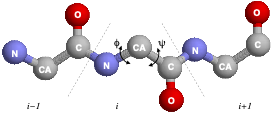

_Figure 1. A protein's main chain. The heavy (i.e. non-hydrogen) main chain atoms of three consecutive amino acid residues (i-1, I and i+1) are represented by spheres, and the covalent bonds between these atoms are represented by rods. Nitrogen and oxygen atoms (N and O) are shown in blue and red respectively; carbon atoms are shown in grey. The central carbon atom (the alpha carbon, or C$\alpha$, labelled CA) is the main chain atom to which a side chain (not shown) is attached. Rotation can occur around the bonds labelled $\phi$ (phi) and $\psi$ (psi)._

## Task 1
#### Draw a scatter plot that shows the phi and psi combinations in the data file.

In [12]:
#Read the csv file containing the downloaded data
data = pd.read_csv('data_all.csv')

#Create Plotly figure
fig = px.scatter(data, x='phi', y='psi', color = 'residue name', hover_data=['position', 'chain'], 
                 title='Figure 1: phi and psi combinations')
        
#Display figure
fig.show()

## Task 2

#### Use the K-means clustering method to cluster the phi and psi angle combinations in the data file.

#### a.	Experiment with different values of K. Suggest an appropriate value of K for this task and motivate this choice.
ideas: 
- group by residue name (color) --> k = 20 
- group by phi/psi location (bottom right/left, middle right/left, top right/left) --> k = 6

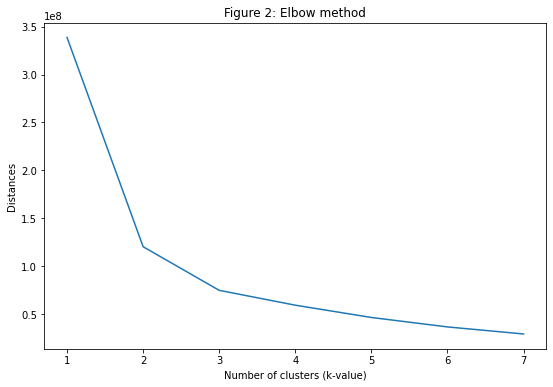

In [31]:
#We can find a suitable k-value with the help of the elbow method

#Take out only coordinates
tempArray= data[["phi", "psi"]]

calculatedDistances = []
#Calculate distances
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(tempArray)
    calculatedDistances.append(kmeanModel.inertia_)
    
#Plot the elbow-graph
plt.figure(figsize=(9,6))
plt.plot(K, calculatedDistances)
plt.xticks(range(1, 8))
plt.xlabel('Number of clusters (k-value)')
plt.ylabel('Distances')
plt.title('Figure 2: Elbow method')
plt.show()

As shown in figure 2. a k-value of 2 or 3, this is where the so called "ebow" is found.  

#### b.	Validate the clusters that are found with the chosen value of K.

#### c.	Do the clusters found in part (a) seem reasonable? 

#### d.	(For A Higher Grade) Can you change the data such that you reach better results? (Hint: since both phi and psi are periodic attributes, you can think of shifting them by some value and then use the modulo operation.) 


## Task 3
#### a.	Motivate:
#### i.	the choice of the minimum number of samples in the neighborhood for a point to be considered as a core point, and

#### ii.	the choice of the maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”).

#### b.	Highlight the clusters found using DBSCAN and any outliers in a scatter plot. How many outliers are found? Plot a bar chart to show which amino acid residue types are most frequently outliers.

#### c.	Compare the clusters found by DBSCAN with those found using K-means.

#### d.	Discuss whether the clusters found using DBSCAN are robust to small changes in the minimum number of samples in the neighborhood for a point to be considered as a core point, and/or the choice of the maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”).

## Task 4

#### The data file can be stratified by amino acid residue type. Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters. Similarly, investigate how the clusters found for amino acid residues of type GLY differ from the general clusters. Remember that parameters might have to be adjusted from those used in previous questions.
